In [30]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
xls=pd.ExcelFile('Groupes-L1-MPI-PCST-onedrive.xlsx') #load Excel file
df=xls.parse(0,skiprows=1,usecols=[1,2,5,6,7,8,9,11,12,13,14],header=None, 
             #Skip the first row of the excel file, select the columns of interest, 
             #take no header from the file,
             names=['lastName', 'firstName','groupe','cor11','EP1-exam1',
                    'EP2-exam1','cor21','cor12','EP1-exam2','EP2-exam2','cor22'], 
                     #name the selected columns,
                     skipfooter=3) #skip the last 3 rows of the excel file.
df=df[['lastName', 'firstName','groupe','EP1-exam1','EP1-exam2','EP2-exam1','EP2-exam2','cor11','cor12','cor21','cor22']]
#Reorder the columns.
# display(df.head()) #Check the importation of excel file.

#To clean exam note.
exam=['EP1-exam1','EP1-exam2','EP2-exam1','EP2-exam2'] #List the notes columns.
df=df.replace({'ABJ':np.NaN,'ABI':np.NaN})
df[exam] = df[exam].apply(pd.to_numeric, errors='coerce') #Convert all notes columns to numeric type.
#To solve case problems in the corrector name nm=NM=nM
cor=['cor11','cor12','cor21','cor22']
for c in cor:
    df[c]=df[c].str.upper()
# display(df.head())


In [31]:
#The name of the first student is changed for confidentiality.
df.loc[0,'lastName']='A'
df.loc[0,'firstName']='B'
#To display the notes of a given student
def dispstud(name, firstname):
    display(df[(df['lastName']==name) & (df['firstName']== firstname)])
dispstud('A', 'B')    

lastName firstName groupe  EP1-exam1  EP1-exam2  EP2-exam1  EP2-exam2 cor11  \
0        A         B    15A      13.25       17.0       10.5       11.5    RS   

  cor12 cor21 cor22  
0    GL    LA    NM

In [32]:
print('Moyenne selon le correcteur :')
def corrmean(corr,exam):
    print(exam)
    df[corr]=df[corr].str[:3].str.replace(' ','') #clean correcteur format to keep initials only(first 2 char)       
#    print(df['corr'].unique()) #display the set of unique correcteur  
    display(df.groupby(corr)[exam].mean()) #calculate the mean per correcteur

corrmean('cor21','EP2-exam1')


Moyenne selon le correcteur :
EP2-exam1


cor21
LA     8.772727
NM     9.722222
NR     7.926020
NY     9.492754
PB     9.985714
RG     9.642857
RS     9.214286
SM     9.544118
TH     9.942029
VTP    8.985714
Name: EP2-exam1, dtype: float64

COMPARISON OF THE GROUPS

In [33]:
#COMPARISON OF THE GROUPS
df=df.dropna(subset=['groupe'])
df['groupe']=df['groupe'].astype('str').str.extract('(\d+)')
df['groupe']=df['groupe'].astype(int)

dfmoy=df.groupby('groupe').agg({'EP1-exam1':'mean','EP2-exam1':'mean','EP1-exam2':'mean','EP2-exam2':'mean','groupe':'count'})
dfmoy.rename(columns={'groupe':'# étudiants'},inplace=True)
display(dfmoy.head(3))    

EP1-exam1  EP2-exam1  EP1-exam2  EP2-exam2  # étudiants
groupe                                                         
1        1.250000   0.000000        NaN        NaN            1
2        7.480769   8.019231   7.326923   8.000000           41
4       12.544872   8.185897  10.551282   9.027027           42

DETAILS OF A GROUP

In [34]:
#DETAILS OF A GROUP
def grpmean(group, plot=False):
    print('Groupe ',group)
    grp=df[df['groupe']==group]
    #select and reorder columns  
    grp=grp[['EP1-exam1','EP2-exam1','EP1-exam2','EP2-exam2','cor11','cor21','cor12','cor22']]
#     grp=grp[['lastName', 'firstName','EP1-exam1','EP2-exam1','EP1-exam2','EP2-exam2','cor11','cor21','cor12','cor22']]
 # 'lastName', 'firstName' columns are removed for the sake of confidentiality.
    grp['Mean']=grp.mean(axis=1) #calculate the mean of the numeric values on each row (axis=1)
    display(grp.sort_values('Mean',ascending=False))#order the rows with respect to the 'Mean' value.
    for ex in exam:
        print('La moyenne pour '+ex +' est: ' ,grp[ex].mean())
    if plot==True:
        sns.pairplot(grp.dropna(), kind='reg', diag_kws = {'bins':8} , vars=exam)

Groupe  2


EP1-exam1  EP2-exam1  EP1-exam2  EP2-exam2 cor11 cor21 cor12 cor22  \
193      20.00      18.50      16.00      18.25    NM    NM    SM    PB   
177      15.75      14.50      16.25      15.25    NM    SM    YL    PB   
509      14.00      12.00      17.00      11.50    GL    RG    OB    NR   
333      15.00      13.00      10.50      13.00    NM    RG    NM    LA   
103      10.25      14.50      12.50      14.00    GL    RG    GL    TH   
64       16.75      10.50      18.00       5.50    GL    PB    GL    TH   
155      13.75      10.00      15.50       8.50    GL    TH    NM   VTP   
63        8.75      15.00      11.50      12.00    NM    PB    GL    TH   
468      17.00       8.50      13.50       6.50    GL    SM    PB    NY   
269      15.00       5.50      18.00       7.00    GL   VTP    SN    SM   
33        9.00      13.00      11.25      11.50    GL    NM    YL    TH   
246      15.75       8.00      13.00       7.75    GL    RS    SN    SM   
250      10.00      17.00       5.50      10.50    NM    NM    NM   VTP   
272      12.00       9.50      11.50       9.75    NM    PB    SM    SM   
512      13.25       5.50      10.50      10.00    GL    SM    GL    RS   
1        11.00      10.50       7.00       8.50    GL    NY    GL    NM   
222       4.00      15.75       3.50      13.25    GL    PB    SM    PB   
314       9.25       7.50       9.00       8.00    NM    LA    SN    RG   
341       4.75       9.75       6.00      10.50    GL    PB    NR    NR   
462       5.50       7.50       7.25       6.00    GL    NR    PB    NY   
476       7.00       3.50       2.00       8.00    GL    PB    LA    NY   
133       6.50       7.50       2.50       3.50    GL    LA    NM    PB   
416       6.75       4.50       1.50       7.00    GL    TH    RS    NR   
356       7.25       6.50       1.00       5.00    GL    PB    NR    NR   
523       2.50       3.00       4.00       9.00    GL    NY    OB    RS   
455       1.75       5.50       4.50       6.50    GL    PB   NaN    NY   
490       1.50       5.25       5.25       6.00    GL    PB    PB    NY   
173       1.00       3.00       3.50      10.00    LA    LA    YL    PB   
315       0.50       7.50        NaN       5.00    GL    NR   NaN    RG   
389       1.75       8.00       2.50       5.00    GL    NR    RS    NR   
6         5.75       2.00       3.00       6.00    NM    NR    YL    NM   
578        NaN        NaN       1.00       7.00   NaN   NaN    RS    NR   
109       2.00       6.50       2.50       4.50    NM    NY    GL    TH   
565       1.50       0.00      11.00       3.00    NM   VTP    OB    RS   
47        3.00       4.50       1.50       5.50    NM    SM    GL    TH   
367       0.50       8.00       0.00       5.00    GL    RS    NR    NR   
394       0.00       5.00       2.00       4.50    NM    NR    RS    LA   
335       0.00       3.00       2.00       5.00    NM    NR    OB    LA   
245       1.75       2.00       0.25       5.25    GL    NR    SM    SM   
498       0.00       1.50       2.50       2.00    NM    RG    PB    NY   
513        NaN        NaN        NaN        NaN   NaN   NaN   NaN   NaN   

          Mean  
193  18.187500  
177  15.437500  
509  13.625000  
333  12.875000  
103  12.812500  
64   12.687500  
155  11.937500  
63   11.812500  
468  11.375000  
269  11.375000  
33   11.187500  
246  11.125000  
250  10.750000  
272  10.687500  
512   9.812500  
1     9.250000  
222   9.125000  
314   8.437500  
341   7.750000  
462   6.562500  
476   5.125000  
133   5.000000  
416   4.937500  
356   4.937500  
523   4.625000  
455   4.562500  
490   4.500000  
173   4.375000  
315   4.333333  
389   4.312500  
6     4.187500  
578   4.000000  
109   3.875000  
565   3.875000  
47    3.625000  
367   3.375000  
394   2.875000  
335   2.500000  
245   2.312500  
498   1.500000  
513        NaN

La moyenne pour EP1-exam1 est:  7.480769230769231
La moyenne pour EP1-exam2 est:  7.326923076923077
La moyenne pour EP2-exam1 est:  8.01923076923077
La moyenne pour EP2-exam2 est:  8.0


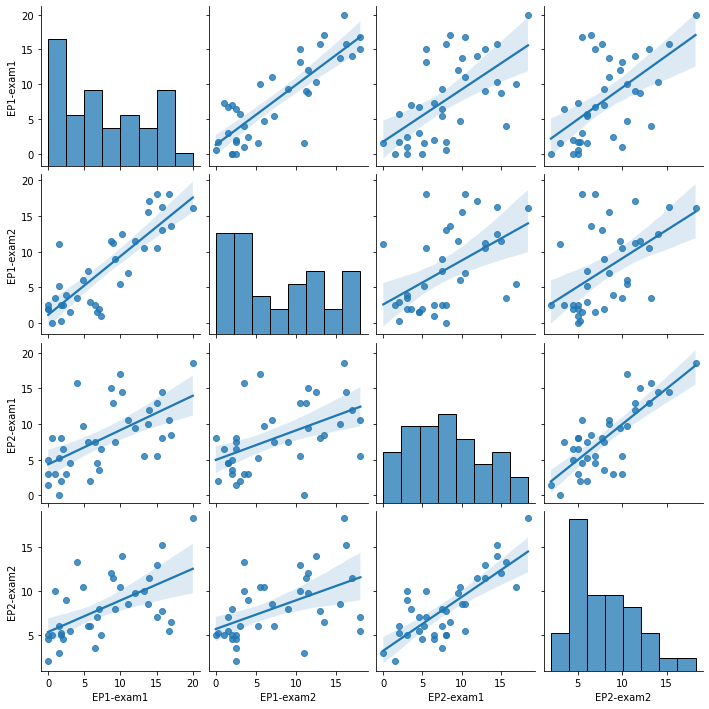

In [35]:
grpmean(2,plot=True)

Distribution of the notes of all the students.

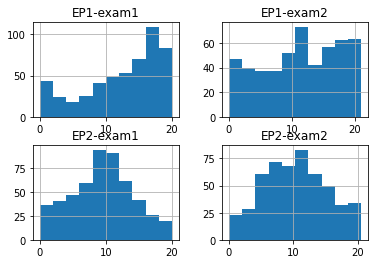

In [36]:
#Distribution of the notes of all the students.
df[exam].hist(bins=10)
plt.show()

EMPIRICAL CUMULATIVE DISTRIBUTION FUNCTION.

y is the proportion of measures that gave value smaller than x.

In [37]:
#Empirical Cumulative Distribution Function. (Another way to visualize data distribution.)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [38]:
def plotecdf(ex):
    x,y=ecdf(df[ex])
    plt.plot(x,y, marker='.', linestyle='none', label=ex)
    plt.legend()

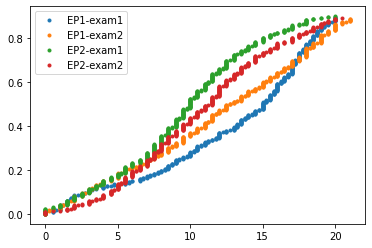

In [39]:
for e in exam:
    plotecdf(e)
#y is the proportion of measures that gave value smaller than x.

CORRELATION

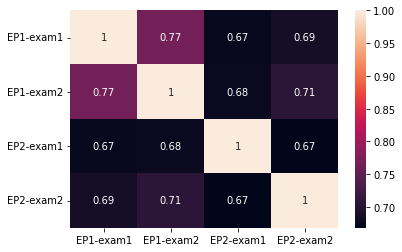

In [40]:
#Correlation.
# Generate correlation matrix
corr = df[exam].corr(method='pearson')

# Draw the heatmap 
sns.heatmap(corr, 
              annot = True );   # Include values within squares